In [23]:
!pip install pandas matplotlib numpy nltk seaborn sklearn gensim wordcloud textblob spacy textstat

     |████████████████████████████████| 102kB 4.1MB/s 
     |████████████████████████████████| 1.9MB 26.7MB/s 


# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import time
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import xlrd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import cohen_kappa_score
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Loading and Defining the Dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/ai_hiring/train.csv")

In [3]:
#x_train
X = df  
#y_train    
y = X['evaluator_rating']   

In [4]:
#test_data
test_df=pd.read_csv("/content/drive/MyDrive/ai_hiring/test.csv")

#Data Exploration

In [11]:
X.head()

,Unnamed: 0,promptId,uniqueId,essay,evaluator_rating
0,0,1,1_323,"At present age, our education system is not go...",3.0
1,1,1,1_238,I am agree the tightly defined curriculum of o...,4.0
2,2,1,1_212,I strongly agree with the statement that tight...,2.0
3,3,1,1_117,Our education system is nice quitely but i dis...,2.0
4,4,1,1_229,i am totally agree with the statement that tig...,3.0


In [12]:
essays = df['essay']
essays[100]

"Now a days education is something like commit to memory and vomit to the paper at the exam hall. We overlook quality for quantity. For that our knowledge is limited between the pages of the books. Bookish knowledge is not all we should be bother about. Only the marks are not important in life, we must be able to think for some new ideas. But the current education system doesn't allow us this scope. Academic success that is all we think, we dream, we live in. Our idea is that chasing behind success, winning the mice race is all in life. But no, this is not what life is all about. A student now a days wake up in the morning, then he goes for his tuitions, from there he goes to school or college, again tution. We are bound in a chain system. But we need to get ourselves out of this chain. The students of this generation have turned their faces from outdoor games, imagining new creative ideas or some adventural sports. All of their target is to get high class degree and settle in abroad w

## Text Length

The length of the samples in the dataset is very important, as it can affect how you represent your text as features for the ML models.

The length can also affect the algorithm you use. For example, LSTM networks are much better than vanilla RNN networks on long texts.



count    1240.000000
mean      274.706452
std        68.846563
min        54.000000
25%       227.000000
50%       289.000000
75%       316.000000
max       590.000000
Name: essay, dtype: float64


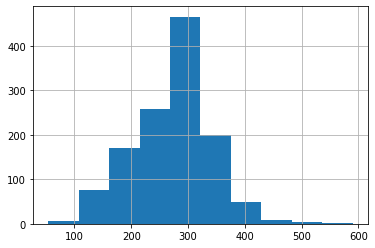

In [13]:
lens = essays.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

## Number of characters present in each sentence

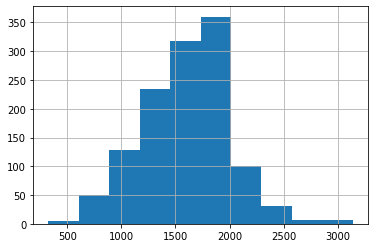

In [14]:
df['essay'].str.len().hist()

## Number of words appearing in each sentence

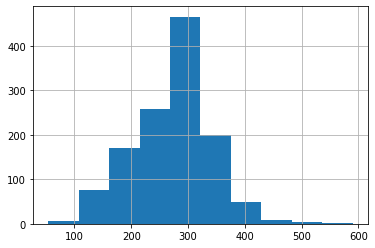

In [15]:
essays.str.split().map(lambda x: len(x)).hist()

## Average word length in each sentence

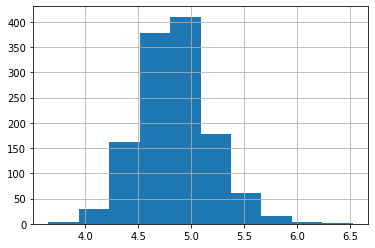

In [16]:
essays.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

## Term Frequencies


In [17]:
stops =  set(stopwords.words('english')+['com'])
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(essays)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

,0
people,3378
technology,3145
poor,1954
nuclear,1797
world,1723
education,1663
also,1577
rich,1536
weapons,1531
life,1365


# Feature Enginerring

In [18]:
corpus=[]
new= df['essay'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
stop=set(stopwords.words('english'))
for word in corpus:
    if word in stop:
        dic[word]+=1

### Let’s inspect which words other than these stopwords occur frequently

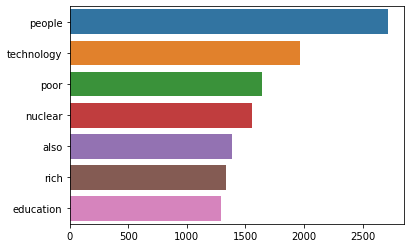

In [19]:
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

## Analyzing the top bigrams in our essay

To build a representation of our vocabulary we will use Countvectorizer. Countvectorizer is a simple method used to tokenize, vectorize and represent the corpus in an appropriate form. 


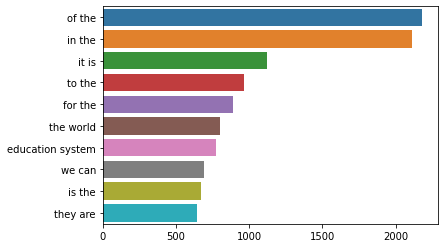

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(essays,2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

## WORDCLOUD

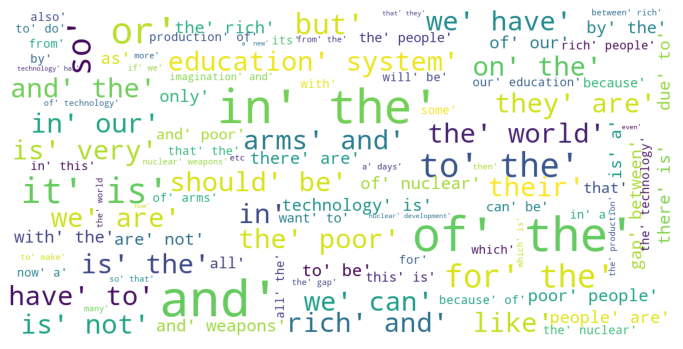

In [21]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(corpus)

## Exploring through text complexity

Readability index is a numeric value that indicates how difficult (or easy) it is to read and understand a text.

Textstat is a cool Python library that provides an implementation of all these text statistics calculation methods.

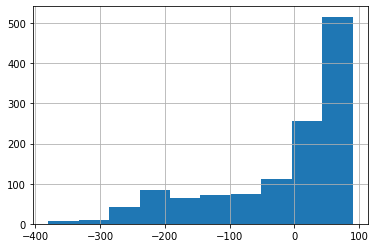

In [24]:
from textstat import flesch_reading_ease
essays.apply(lambda x : flesch_reading_ease(x)).hist()

count    1240.000000
mean      274.706452
std        68.846563
min        54.000000
25%       227.000000
50%       289.000000
75%       316.000000
max       590.000000
Name: essay, dtype: float64


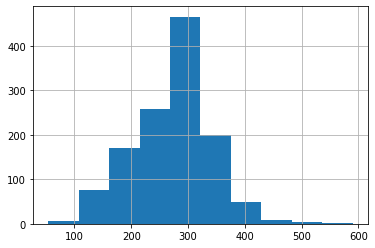

In [25]:
lens = essays.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

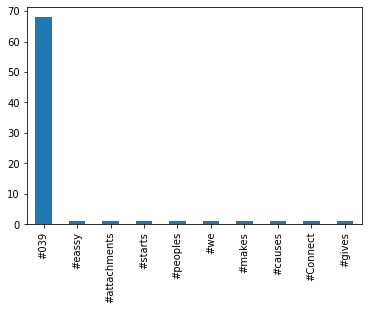

In [26]:
essays.str.extractall(r'(\#\w+)')[0].value_counts().head(20).plot.bar()

# Topic Modeling

Topic modeling is a group of unsupervised machine learning methods aimed to extract meaningful topics from a text corpus. Topic modeling is helpful in exploring a new text dataset and understanding the different types of text samples.

Using the Latent Dirichlet Allocation algorithm with 10 topics and print the most important words in every topic.

In [27]:
from sklearn.decomposition import LatentDirichletAllocation, NMF
vectorizer = CountVectorizer(stop_words=stops)
model = vectorizer.fit(essays)
docs = vectorizer.transform(essays)
lda = LatentDirichletAllocation(20)
lda.fit(docs)
def print_top_words(model, feature_names, n_top_words):
  for topic_idx, topic in enumerate(model.components_):
    message = "Topic #%d: " % topic_idx
    message += " ".join([(feature_names[i])
    for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)
  print()
print_top_words(lda,vectorizer.get_feature_names(),10)

Topic #0: poor people rich money gap society government day also one
Topic #1: also people many good day life technology us new days
Topic #2: education system india new every technogy indian country student child
Topic #3: man good human would well part save food support easy
Topic #4: people world find way india try races know new things
Topic #5: every new use one india person people tecnology would individual
Topic #6: technology us life people world become without human things slaves
Topic #7: life tha school days time also many one give even
Topic #8: time develope earth let treaty kills useing countries thing leading
Topic #9: world value various wealth countries many country fact new nation
Topic #10: genaration find true 14 sysytem year thing resion higer kids
Topic #11: inequality gap rich poor economic income growing wages wealth within
Topic #12: technology new people also work time use life like technologies
Topic #13: education system students creativity imagination stude

# Building the Model

Two Long Short Term Memory (LSTM) layers and a Dense output layer make up the model architecture. 5-Fold Cross Validation is used to train the model on the dataset and the average of all five folds is taken.

## Preprocessing

In [5]:
def essay_to_wordlist(essay_v, remove_stopwords):
    """Removing the tagged labels and tokenizing the sentence."""
    essay_v = re.sub("[^a-zA-Z]", " ", essay_v)
    words = essay_v.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return (words)

def essay_to_sentences(essay_v, remove_stopwords):
    """Sentence tokenization and word tokenization."""
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(essay_v.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(essay_to_wordlist(raw_sentence, remove_stopwords))
    return sentences

def makeFeatureVec(words, model, num_features):
    """Making feature vector"""
    featureVec = np.zeros((num_features,),dtype="float32")
    num_words = 0.
    index2word_set = set(model.wv.index2word)
    for word in words:
        if word in index2word_set:
            num_words += 1
            featureVec = np.add(featureVec,model[word])        
    featureVec = np.divide(featureVec,num_words)
    return featureVec

def getAvgFeatureVecs(essays, model, num_features):
    """Generating work vectors for word2vec model"""
    counter = 0
    essayFeatureVecs = np.zeros((len(essays),num_features),dtype="float32")
    for essay in essays:
        essayFeatureVecs[counter] = makeFeatureVec(essay, model, num_features)
        counter = counter + 1
    return essayFeatureVecs

## Defining the Model

In [6]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten
from keras.models import Sequential, load_model, model_from_config
import keras.backend as K

def get_model():
    """Defining the model."""
    model = Sequential()
    model.add(LSTM(300, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 300], return_sequences=True))
    model.add(LSTM(64, recurrent_dropout=0.4))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    model.summary()

    return model

## Training

In [7]:
cv = KFold(len(X), shuffle=True)
results = []
y_pred_list = []

count = 1
for traincv, testcv in cv.split(X):
    print("\n--------Fold {}--------\n".format(count))
    X_val, X_train, y_val, y_train = X.iloc[testcv], X.iloc[traincv], y.iloc[testcv], y.iloc[traincv]

    

    test_essays=test_df['essay']
    test_data_id=test_df['uniqueId']
    
    train_essays = X_train['essay']
    val_essays = X_val['essay']
    
    sentences = []
    
    for essay in train_essays:
            sentences += essay_to_sentences(essay, remove_stopwords = True)
            
    # Initializing variables for word2vec model.
    num_features = 300 
    min_word_count = 40
    num_workers = 4
    context = 10
    downsampling = 1e-3

    print("Training Word2Vec Model...")
    model = Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count, window = context, sample = downsampling)

    model.init_sims(replace=True)
    model.wv.save_word2vec_format('word2vecmodel.bin', binary=True)

    clean_train_essays = []
    
    # Generate training and testing data word vectors.
    for essay_v in train_essays:
        clean_train_essays.append(essay_to_wordlist(essay_v, remove_stopwords=True))
    trainDataVecs = getAvgFeatureVecs(clean_train_essays, model, num_features)
    
    clean_test_essays = []
    for essay_v in test_essays:
        clean_test_essays.append(essay_to_wordlist( essay_v, remove_stopwords=True ))
    testDataVecs = getAvgFeatureVecs( clean_test_essays, model, num_features )

    clean_val_essays = []
    for essay_v in val_essays:
        clean_val_essays.append(essay_to_wordlist( essay_v, remove_stopwords=True ))
    valDataVecs = getAvgFeatureVecs( clean_val_essays, model, num_features )
    
    trainDataVecs = np.array(trainDataVecs)
    testDataVecs = np.array(testDataVecs)
    valDataVecs = np.array(valDataVecs)
    # Reshaping train and test vectors to 3 dimensions.
    trainDataVecs = np.reshape(trainDataVecs, (trainDataVecs.shape[0], 1, trainDataVecs.shape[1]))
    testDataVecs = np.reshape(testDataVecs, (testDataVecs.shape[0], 1, testDataVecs.shape[1]))
    valDataVecs = np.reshape(valDataVecs, (valDataVecs.shape[0], 1, valDataVecs.shape[1]))
    
    lstm_model = get_model()
    lstm_model.fit(trainDataVecs, y_train, batch_size=64, epochs=50)
    
    y_pred_val = lstm_model.predict(testDataVecs)
    if count == 5:
         y_pred = lstm_model.predict(testDataVecs)
         y_pred = np.around(y_pred)
         lstm_model.save('./model_weights/final_lstm.h5')
         break
    
    # Round y_pred to the nearest integer.
    y_pred_val = np.around(y_pred_val)
    count+=1


--------Fold 1--------

Training Word2Vec Model...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 300)            721200    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 814,705
Trainable params: 814,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
20/20 [==============================] - 28s 26ms/step - loss: 5.5513 - mae: 2.0509
Epoch 2/50
20/20 [==============================] - 1s 27ms/step - loss: 1.3079 - mae: 0.8709
Epoch 3/50
20/20 [==============================] - 1s 26ms

# Submission

In [8]:
data=pd.DataFrame((zip(test_data_id,test_essays, y_pred)),columns=['unique_id','essay','predicted_score'])

In [10]:
data.to_csv('test_prediction.csv',index=False)